# **Final Assignment**
In this assignment, you will implement K-Nearest Neighbour (KNN) and Ordinary Least Square (OLS) regression methods. Download the [excel file](https://docs.google.com/spreadsheets/d/17f6h4h-4x6XMuI4Budcw4Ujoxd0ceogv). The dataset contains 11 columns: `"bedrooms"`, `"bathrooms"`, `"sqft_living"`, `"sqft_lot"`, `"floors"`, `"condition"`, `"grade"`, `"sqft_above"`, `"sqft_basement"`, `"age"`and `"price"`.
Use `pd.read_excel()` to read the file and make prediction of whether a given house is likely to be expensive based on the features related to the house.

Use KNN and OLS regression independently to determine and compare their performance in terms of accuracy and confusion matrix.

To accomplish this task, you will have to convert the values under `"price"` into one of two possible values: **1** and **0** denoting "expensive" and "cheap" respectively. For this, if the price of the house is less than `450000`, it is "cheap"; otherwise it is "expensive" . 

**Note:**This conversion must be done before training for KNN, and after conversa for OLS regression, on each predicted `"price"`.

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
df = pd.read_excel("/content/house_data.xlsx")
print(df[:10])

   bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  grade  \
0         3       1.00         1180      5650     1.0          3      7   
1         3       2.25         2570      7242     2.0          3      7   
2         2       1.00          770     10000     1.0          3      6   
3         4       3.00         1960      5000     1.0          5      7   
4         3       2.00         1680      8080     1.0          3      8   
5         4       4.50         5420    101930     1.0          3     11   
6         3       2.25         1715      6819     2.0          3      7   
7         3       1.50         1060      9711     1.0          3      7   
8         3       1.00         1780      7470     1.0          3      7   
9         3       2.50         1890      6560     2.0          3      7   

   sqft_above  sqft_basement  age    price  
0        1180              0   68   221900  
1        2170            400   72   538000  
2         770              0   90   180

In [62]:
df["price"] = np.where(df["price"] >= 450000, 1, 0)
print(df[:10])

   bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  grade  \
0         3       1.00         1180      5650     1.0          3      7   
1         3       2.25         2570      7242     2.0          3      7   
2         2       1.00          770     10000     1.0          3      6   
3         4       3.00         1960      5000     1.0          5      7   
4         3       2.00         1680      8080     1.0          3      8   
5         4       4.50         5420    101930     1.0          3     11   
6         3       2.25         1715      6819     2.0          3      7   
7         3       1.50         1060      9711     1.0          3      7   
8         3       1.00         1780      7470     1.0          3      7   
9         3       2.50         1890      6560     2.0          3      7   

   sqft_above  sqft_basement  age  price  
0        1180              0   68      0  
1        2170            400   72      1  
2         770              0   90      0  
3 

In [63]:
print(df.iloc[:, :-1])

       bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  grade  \
0             3       1.00         1180      5650     1.0          3      7   
1             3       2.25         2570      7242     2.0          3      7   
2             2       1.00          770     10000     1.0          3      6   
3             4       3.00         1960      5000     1.0          5      7   
4             3       2.00         1680      8080     1.0          3      8   
...         ...        ...          ...       ...     ...        ...    ...   
21608         3       2.50         1530      1131     3.0          3      8   
21609         4       2.50         2310      5813     2.0          3      8   
21610         2       0.75         1020      1350     2.0          3      7   
21611         3       2.50         1600      2388     2.0          3      8   
21612         2       0.75         1020      1076     2.0          3      7   

       sqft_above  sqft_basement  age  
0          

In [64]:
X = df.iloc[:, :-1] #except -- price column
y = df["price"]
test_size = 0.2
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [65]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("KNN Accuracy: ", accuracy_knn)
print("KNN Confusion Matrix: \n", conf_matrix_knn)

KNN Accuracy:  0.7281980106407587
KNN Confusion Matrix: 
 [[1570  534]
 [ 641 1578]]


In [66]:
label_map = {0: 'cheap', 1: 'expensive'}

y_test_knn = pd.Series(y_test).map(label_map)
y_pred_knn = pd.Series(y_pred_knn).map(label_map)

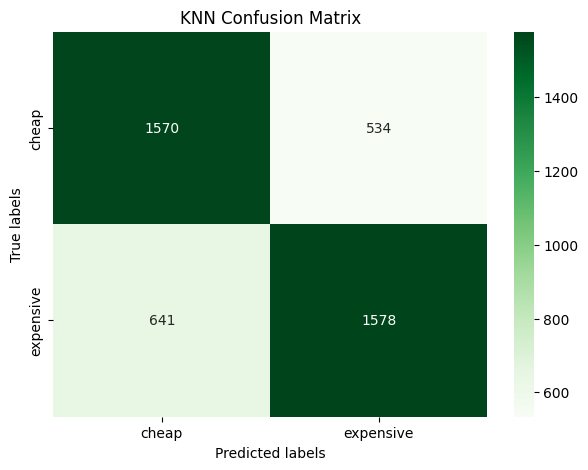

In [67]:
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix_knn, cmap='Greens', fmt='', annot=True,  xticklabels=label_map.values(), yticklabels=label_map.values())
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("KNN Confusion Matrix")
plt.show()

In [68]:
#OLS 
ols = LinearRegression()
ols.fit(X_train, y_train)
y_pred_ols = np.where(ols.predict(X_test) >= 0.5, 1, 0)
accuracy_ols = accuracy_score(y_test, y_pred_ols)
conf_matrix_ols = confusion_matrix(y_test, y_pred_ols)
print("OLS Accuracy: ", accuracy_ols)
print("OLS Confusion Matrix: \n", conf_matrix_ols)

OLS Accuracy:  0.7883414295628036
OLS Confusion Matrix: 
 [[1797  307]
 [ 608 1611]]


In [69]:
label_map = {0: 'cheap', 1: 'expensive'}

y_test_ols = pd.Series(y_test).map(label_map)
y_pred_ols = pd.Series(y_pred_ols).map(label_map)

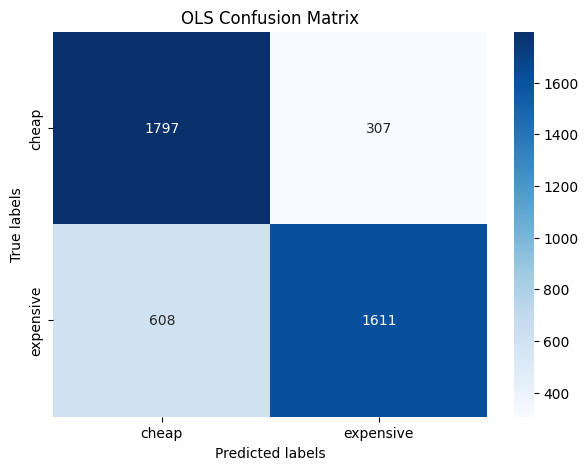

In [70]:
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix_ols, cmap='Blues', fmt='', annot=True, xticklabels=label_map.values(), yticklabels=label_map.values())
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("OLS Confusion Matrix")
plt.show()